In [1]:
import requests
import bs4
import json
from datetime import date, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def parse_histogram(h):
    data = {}
    for item in h:
        d = date.fromtimestamp(item['ts'])
        data[d] = item['value']
        d += timedelta(days=1)
    return data

In [3]:
def make_full(data):
    full_data = []
    min_date = min(min(v.keys()) for v in data.values())
    max_date = max(max(v.keys()) for v in data.values())
    d = min_date
    while d <= max_date:
        row = {'date': d}
        for k in data:
            row[k] = data[k].get(d, np.nan)
        full_data.append(row)
        d += timedelta(days=1)
    return full_data

In [4]:
r = requests.get('https://yandex.ru/web-maps/covid19')
soup = bs4.BeautifulSoup(r.text, features='lxml')
script = soup.find_all('script', class_='config-view')[0]
j = json.loads(script.text)
data = {}
for item in j['covidData']['items']:
    if item.get('ru') and 'histogram' in item:
        data[item['name']] = parse_histogram(item['histogram'])
data = make_full(data)
df = pd.DataFrame(data)

In [5]:
df.set_index('date', inplace=True)

In [30]:
top10 = list(map(
    lambda p: p[0],
    sorted(df.tail(1).to_dict(orient='records')[0].items(), key=lambda p: p[1], reverse=True)[:10],
))

In [31]:
top10

['Москва',
 'Московская область',
 'Санкт-Петербург',
 'Нижегородская область',
 'Республика Дагестан',
 'Мурманская область',
 'Свердловская область',
 'Краснодарский край',
 'Тульская область',
 'Ростовская область']

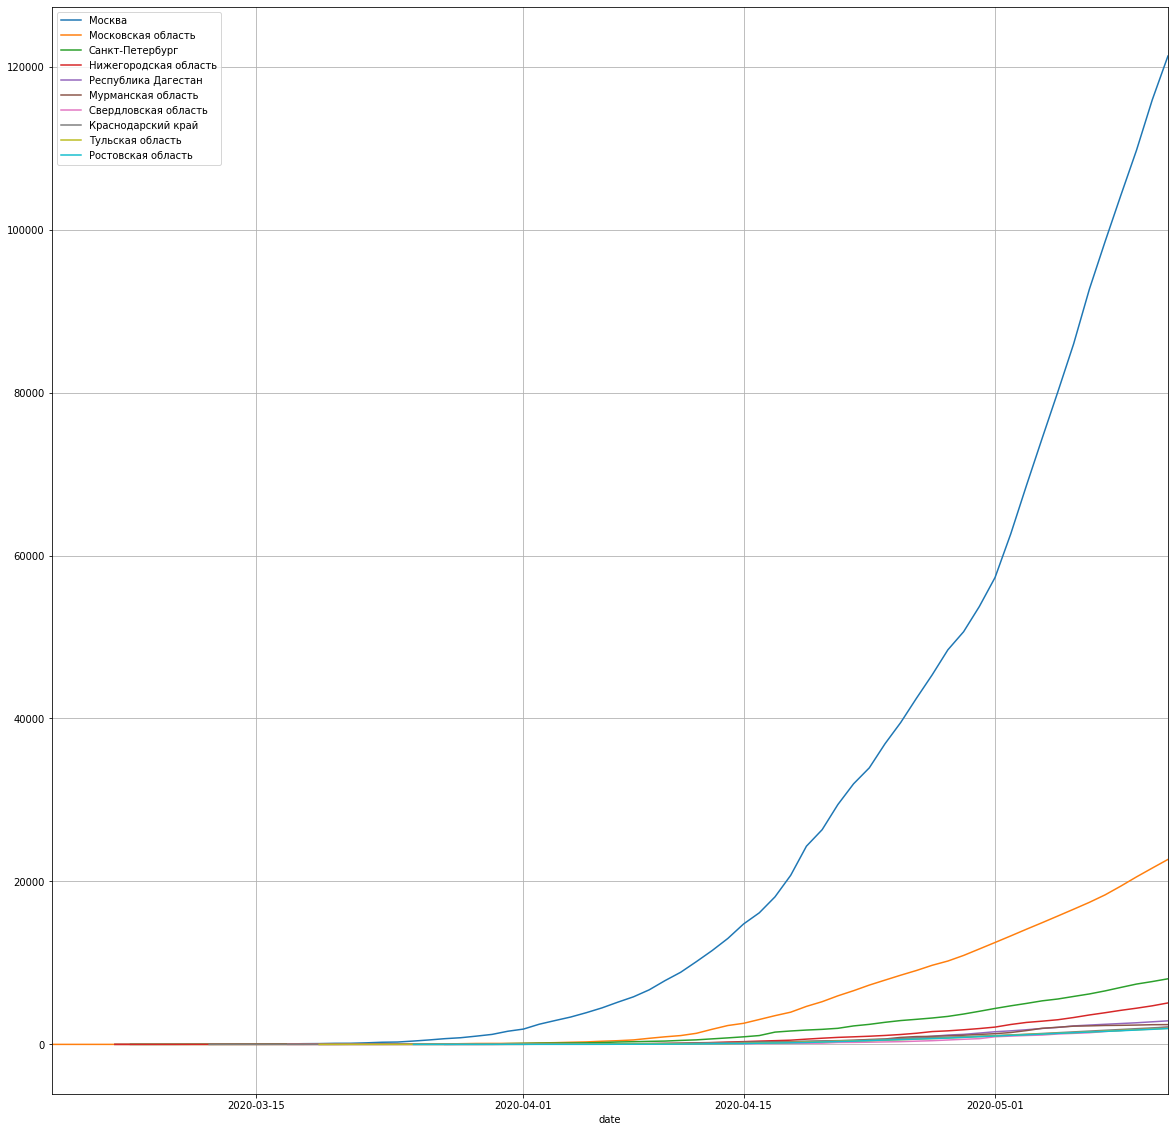

In [32]:
df[top10].plot(figsize=(20, 20), grid=True);

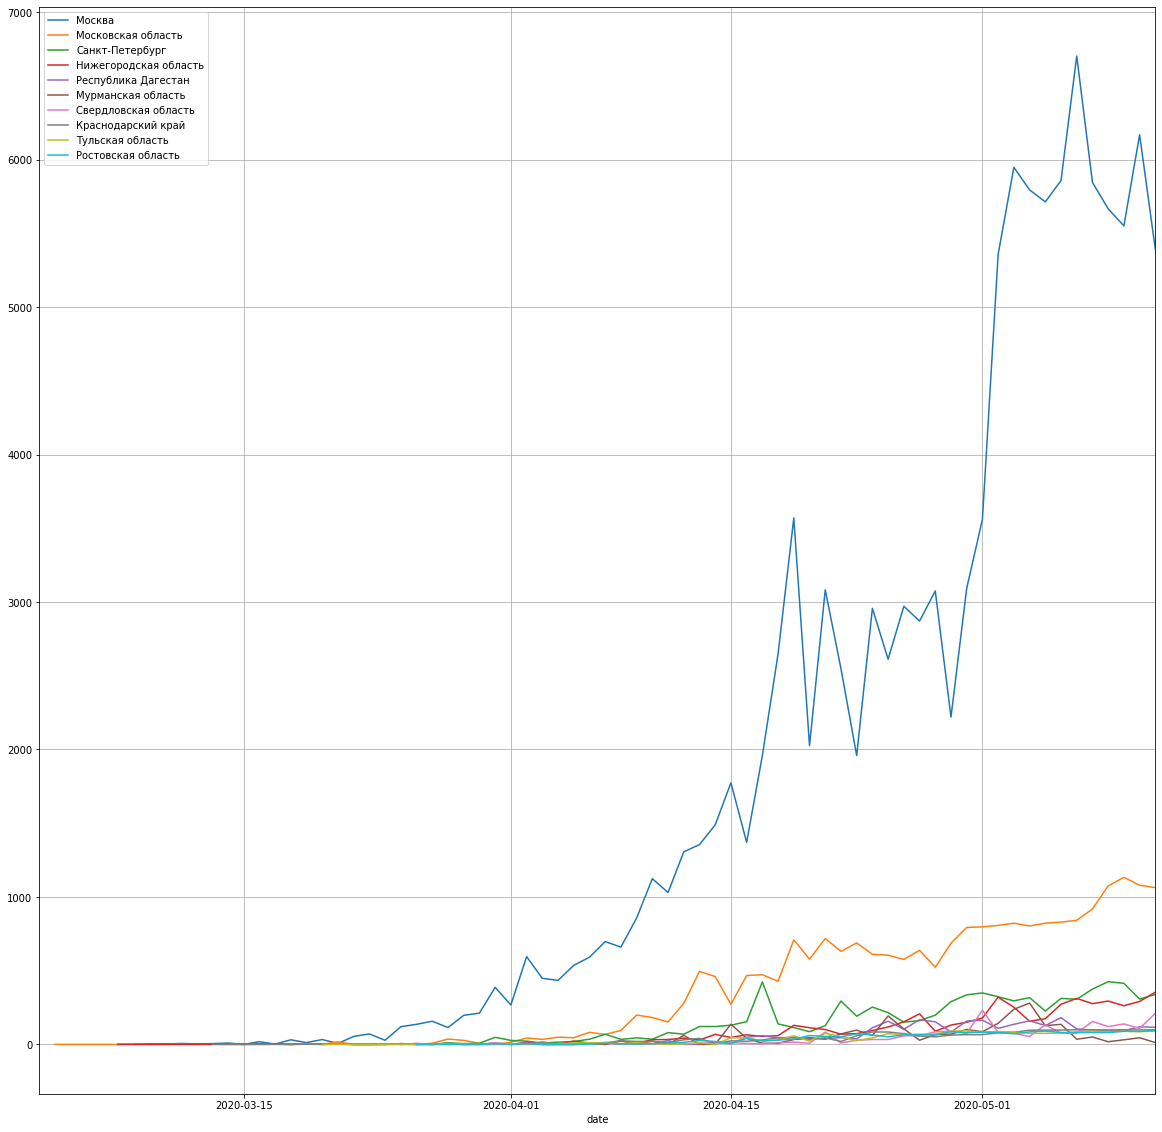

In [33]:
df[top10].diff().plot(figsize=(20, 20), grid=True);

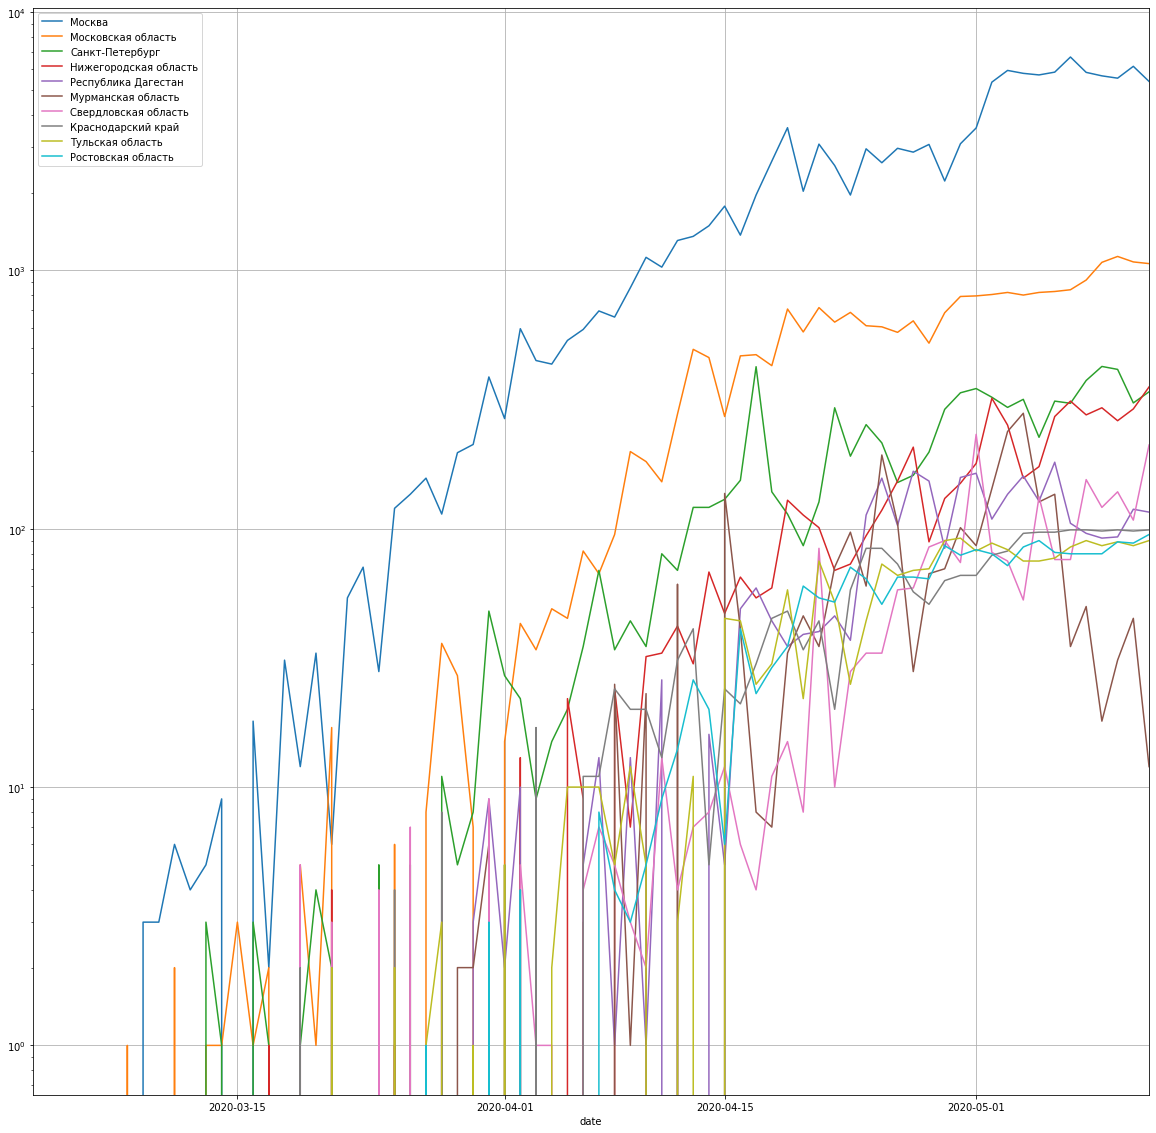

In [34]:
df[top10].diff().plot(figsize=(20, 20), grid=True, logy=True);

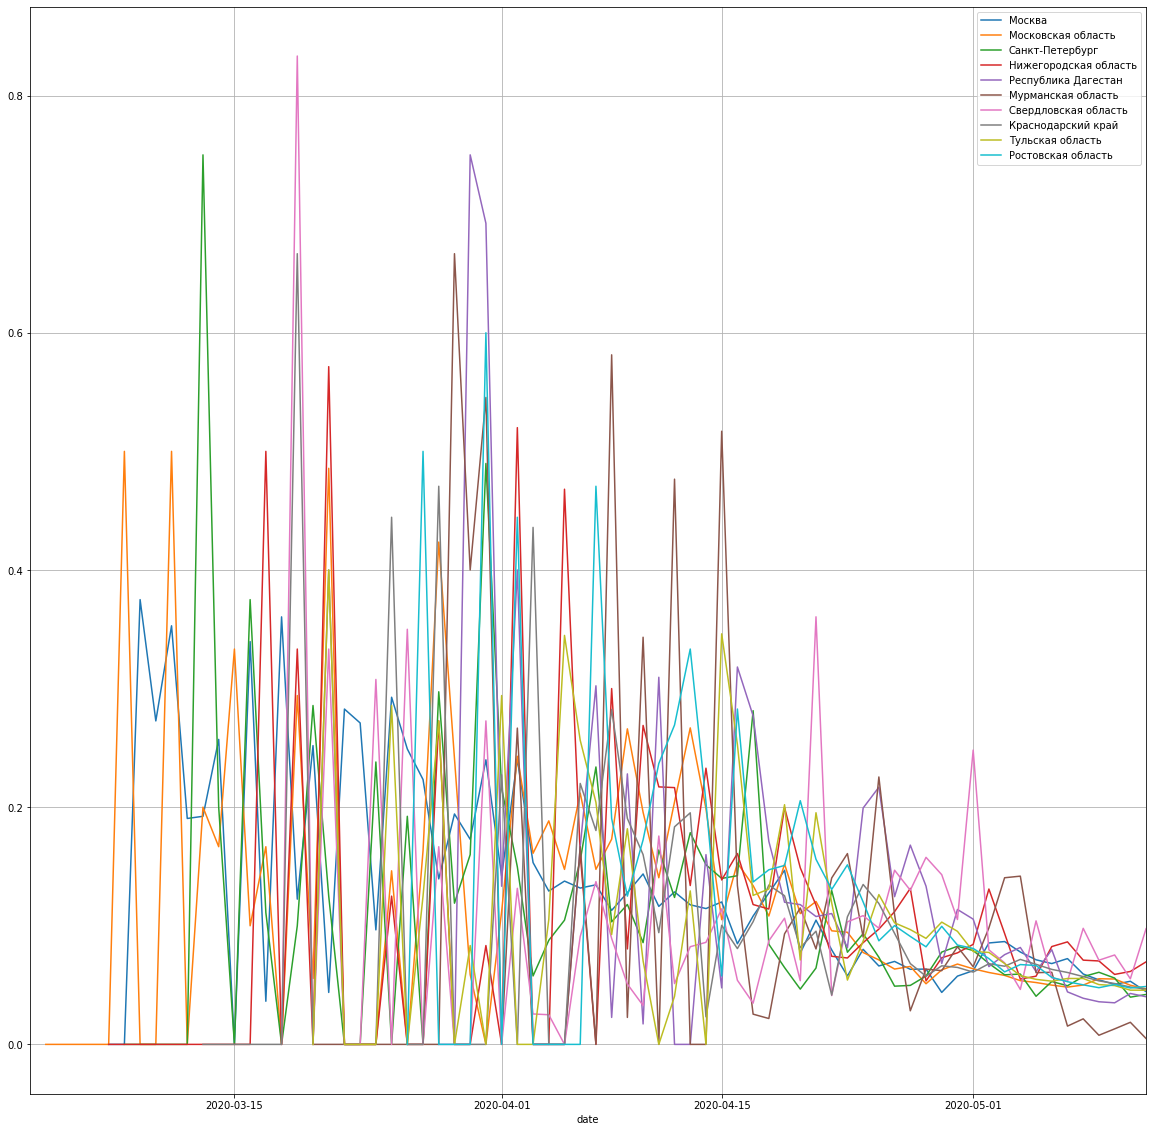

In [35]:
(df[top10].diff() / df[top10]).plot(figsize=(20, 20), grid=True);